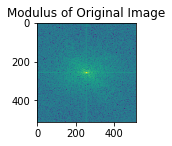

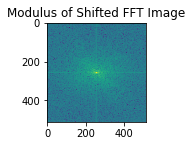

In [2]:
#PROBLEM 3

 
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
from matplotlib import pylab as pt

m=512;
n=512;
s=80;

img = np.fromfile('lena.bin',dtype='uint8',count=-1)
img = img.reshape(m,n)

fourier = fft2(img)
#print(fourier)

#Real Part of FFT Image
image_real = np.real(fourier)
#print(image_real)

#Imaginary Part of FFT Image
image_imaginary = np.imag(fourier)
#print(image_imaginary)

#Take Modulus of FFT Image
img_mod = np.sqrt((image_real*image_real) + (image_imaginary*image_imaginary))

img_mod = fftshift(np.log(abs(img_mod)))
#print(img_mod)

f = pt.figure()
f.add_subplot(2,2, 1)
pt.title("Modulus of Original Image")
pt.imshow(img_mod)


#For Shifted FFT Image
def modn(x, M):
    if (0<=x<M):
        return x
    else:
        x = ((x%M)+M)%M
        return x
    
    
imgShift = np.zeros((m,n),dtype='uint8')
for k in range(m):
    for l in range(n):
        imgShift[k][l] =  img[modn(k+s,m)][modn(l+s,n)]


#FFT Of Shifted Image:

FFT_Shift_img = fft2(imgShift)

#Real Part of Shifted FFT Image
Shiftimage_real = np.real(FFT_Shift_img)
#print(image_real)

#Imaginary Part of FFT Image
Shiftimage_imaginary = np.imag(FFT_Shift_img)
#print(image_imaginary)

#Take Modulus of FFT Image
Shiftimg_mod = np.sqrt((Shiftimage_real*Shiftimage_real) + (Shiftimage_imaginary*Shiftimage_imaginary))

Shiftimg_mod = fftshift(np.log(abs(Shiftimg_mod)))
#print(img_mod)

f = pt.figure()
f.add_subplot(2,2, 2)
pt.title("Modulus of Shifted FFT Image")
pt.imshow(Shiftimg_mod)